In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import time
from tree.base import DecisionTree
from metrics import *
# Retina mode
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

np.random.seed(42)

Q4. Create some fake data to do some experiments on the runtime complexity of your decision tree algorithm. Create a dataset with N samples and M binary features. Vary M and N to plot the time taken for: 1) learning the tree, 2) predicting for test data. How do these results compare with theoretical time complexity for decision tree creation and prediction. You should do the comparison for all the four cases of decision trees.

1. Tree Building:

Worst-case complexity: O(N⋅M⋅log(N)), where N is the number of samples and M is the number of features. 

For each feature and each node, the algorithm potentially needs to evaluate all samples and split them, leading to this complexity.

2. Prediction:
For each sample, predicting the output involves traversing the tree from the root to a leaf. The depth of the tree is typically O(log(N)). Thus, predicting for 𝑁test samples has a time complexity of 𝑂(𝑁test⋅log(N)).

In [2]:
# Function to generate fake data
def generate_data(N, M, input_type, output_type):    
    if input_type == "real":
        X = pd.DataFrame(np.random.randn(N, M))
    elif input_type == "discrete":
        X = pd.DataFrame({i: pd.Series(np.random.randint(2, size=N), dtype="category") for i in range(M)})

    if output_type == "real":
        y = pd.Series(np.random.randn(N))
    elif output_type == "discrete":
        y = pd.Series(np.random.randint(M, size=N), dtype="category")

    return X, y

In [3]:
# Function to evaluate the runtime of the DecisionTree
def evaluate_runtime(N, M, input_type, output_type, test_size, criterias):
    X, y = generate_data(N, M, input_type, output_type)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)
    time_data = {}
    for criteria in criterias:
        tree = DecisionTree(criterion=criteria, max_depth=5)
        
        start_train = time.time()
        tree.fit(X_train, y_train)
        end_train = time.time()
        train_time = end_train - start_train

        start_test = time.time()
        y_pred = tree.predict(X_test)
        end_test = time.time()
        test_time = end_test - start_test

        print(f"    Criteria: {criteria}")
        print(f"        Training Time: {train_time:.4f} seconds")
        print(f"        Prediction Time: {test_time:.4f} seconds")

        time_data[criteria] = {"train_time": train_time, "test_time": test_time}

    return time_data

In [4]:
N_values = [50, 100, 500, 1000, 5000]
M_values = [1, 5, 10, 20, 50, 100]

criterias = ["information_gain", "gini_index"]
# criterias = ["information_gain"]

In [5]:
results = {}
for N in N_values:
    for M in M_values:
        print(f"\nEvaluating for N={N}, M={M}\n")
        results[(N, M)] = {}
        for input_type in ["real", "discrete"]:
            for output_type in ["real", "discrete"]:
                print(f"    Input type: {input_type}, Output type: {output_type}")
                results[(N, M)][(input_type, output_type)] = evaluate_runtime(N, M, input_type, output_type, 0.2, criterias)
                print()
        print("=" * 50)



Evaluating for N=50, M=1

    Input type: real, Output type: real
    Criteria: information_gain
        Training Time: 0.1660 seconds
        Prediction Time: 0.0000 seconds
    Criteria: gini_index
        Training Time: 0.2851 seconds
        Prediction Time: 0.0000 seconds

    Input type: real, Output type: discrete
    Criteria: information_gain
        Training Time: 0.0000 seconds
        Prediction Time: 0.0000 seconds
    Criteria: gini_index
        Training Time: 0.0000 seconds
        Prediction Time: 0.0000 seconds

    Input type: discrete, Output type: real
    Criteria: information_gain
        Training Time: 0.0040 seconds
        Prediction Time: 0.0000 seconds
    Criteria: gini_index
        Training Time: 0.0030 seconds
        Prediction Time: 0.0010 seconds

    Input type: discrete, Output type: discrete
    Criteria: information_gain
        Training Time: 0.0000 seconds
        Prediction Time: 0.0000 seconds
    Criteria: gini_index
        Training Time: 0

In [ ]:
import pickle

with open(r'5.4 Data/5.4_results.pkl', 'wb') as f:
    pickle.dump(results, f)

## Plotting train and predict time vs N / M 

In [6]:
import pickle

with open(r'5.4 Data\5.4_results.pkl', 'rb') as f:
    main_data = pickle.load(f)

print(main_data)

{(50, 1): {('real', 'real'): {'information_gain': {'train_time': 0.16603946685791016, 'test_time': 0.0}, 'gini_index': {'train_time': 0.28511619567871094, 'test_time': 0.0}}, ('real', 'discrete'): {'information_gain': {'train_time': 0.0, 'test_time': 0.0}, 'gini_index': {'train_time': 0.0, 'test_time': 0.0}}, ('discrete', 'real'): {'information_gain': {'train_time': 0.004022836685180664, 'test_time': 0.0}, 'gini_index': {'train_time': 0.002991199493408203, 'test_time': 0.0009961128234863281}}, ('discrete', 'discrete'): {'information_gain': {'train_time': 0.0, 'test_time': 0.0}, 'gini_index': {'train_time': 0.0, 'test_time': 0.0}}}, (50, 5): {('real', 'real'): {'information_gain': {'train_time': 0.4339604377746582, 'test_time': 0.0}, 'gini_index': {'train_time': 0.7091052532196045, 'test_time': 0.0}}, ('real', 'discrete'): {'information_gain': {'train_time': 1.0767772197723389, 'test_time': 0.0}, 'gini_index': {'train_time': 0.8609349727630615, 'test_time': 0.0}}, ('discrete', 'real'): 

Time vs Number of Samples (N)


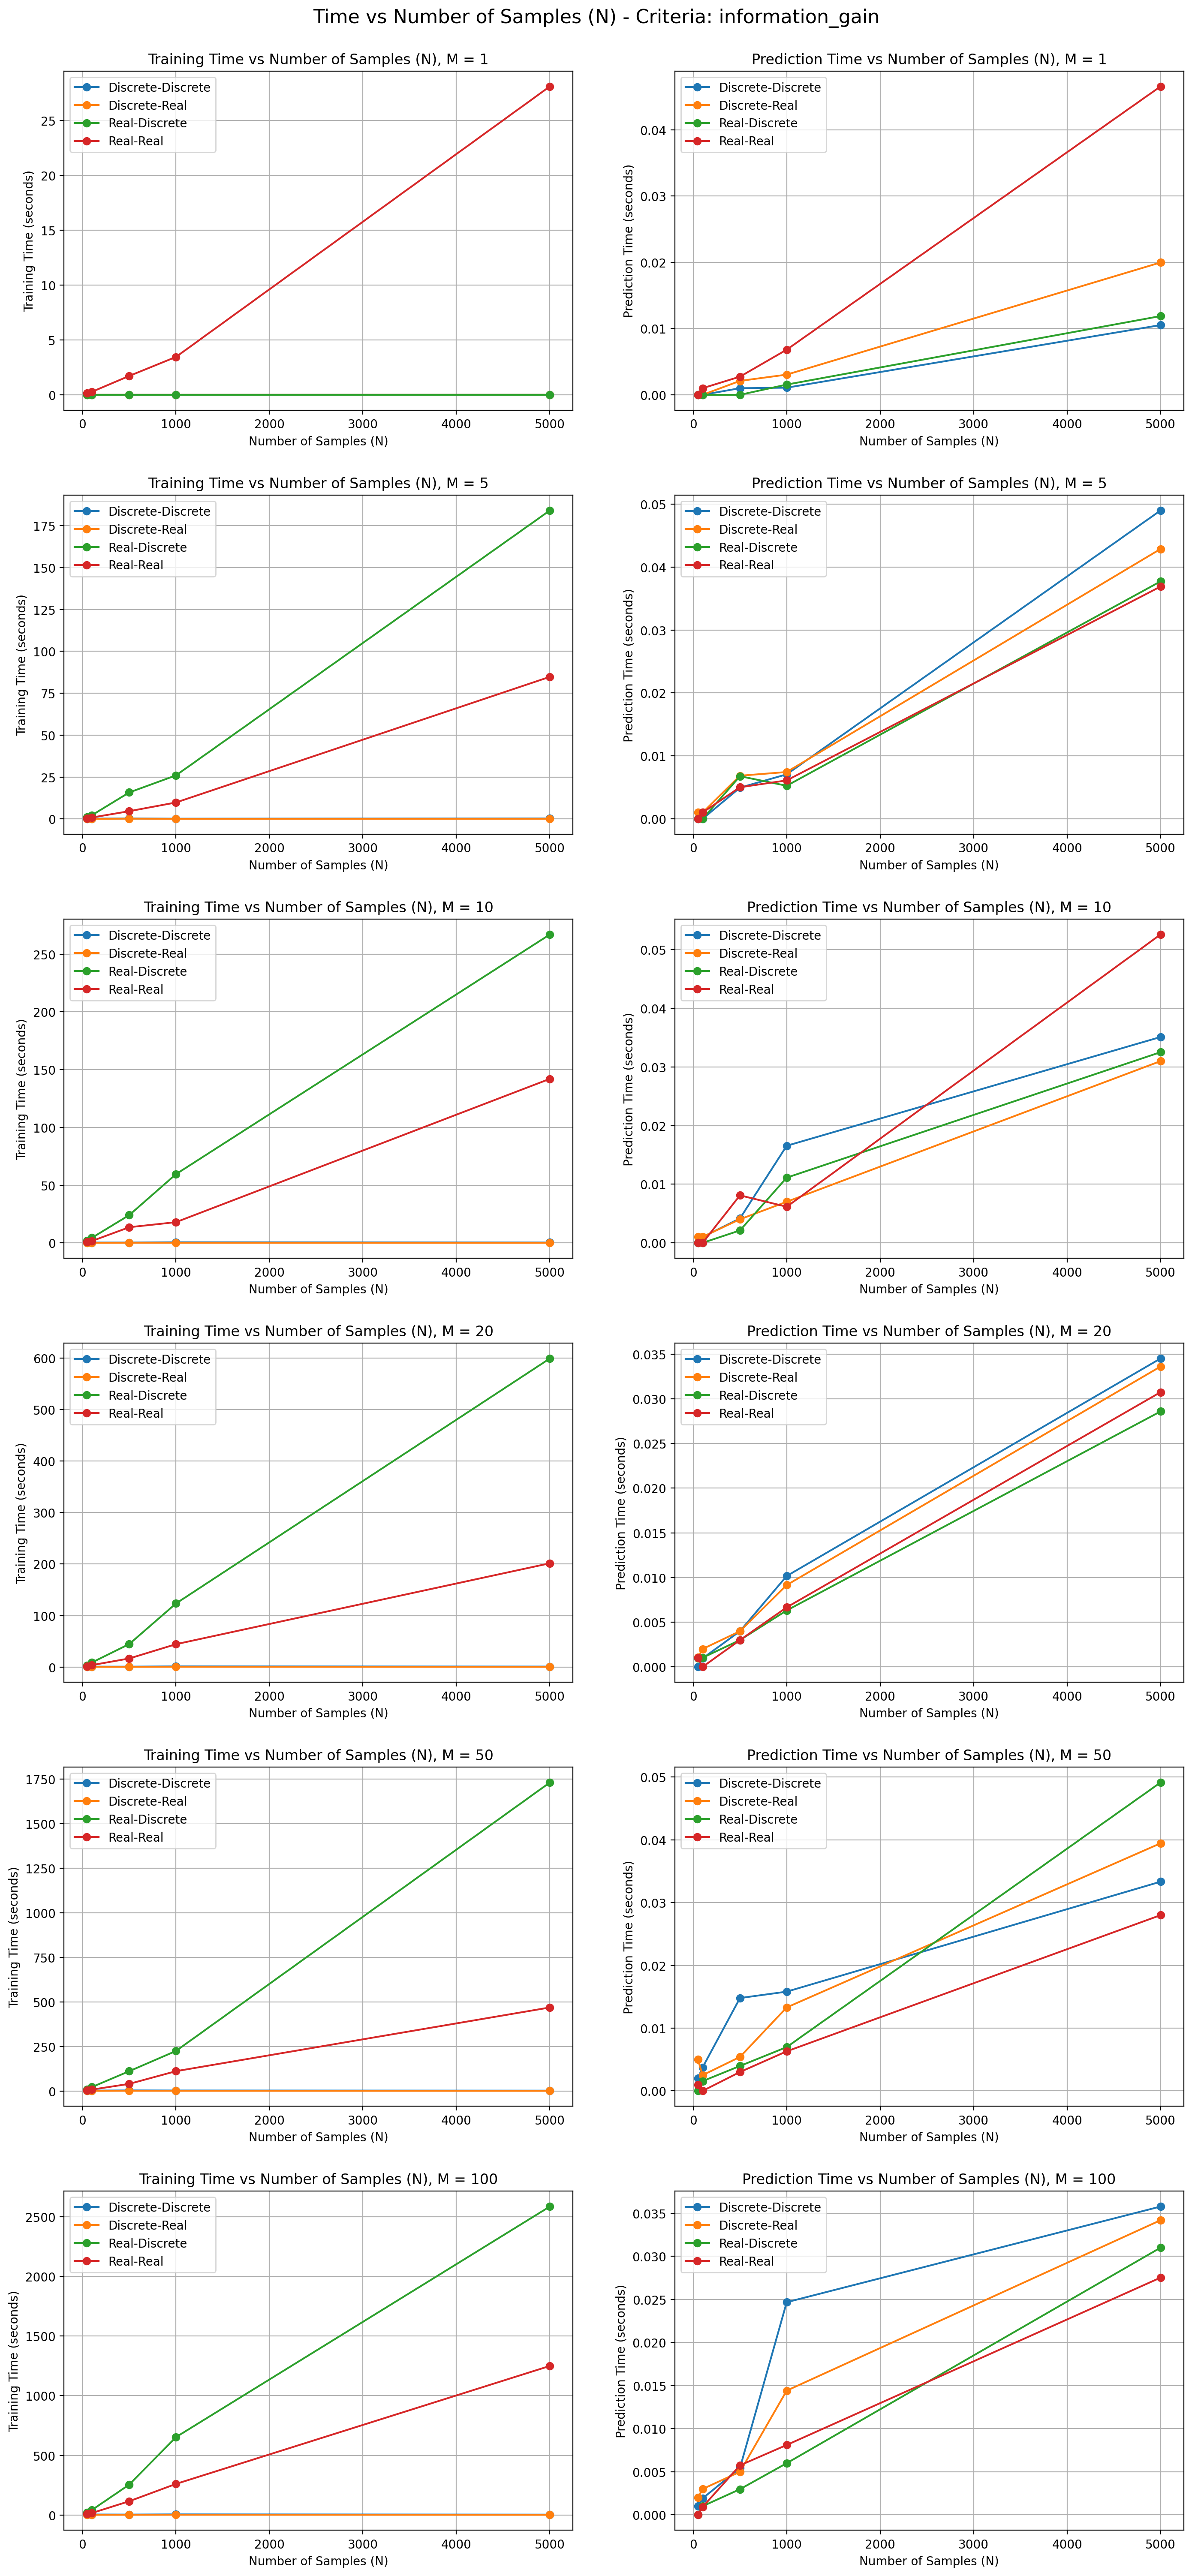

Time vs Number of Features (M)


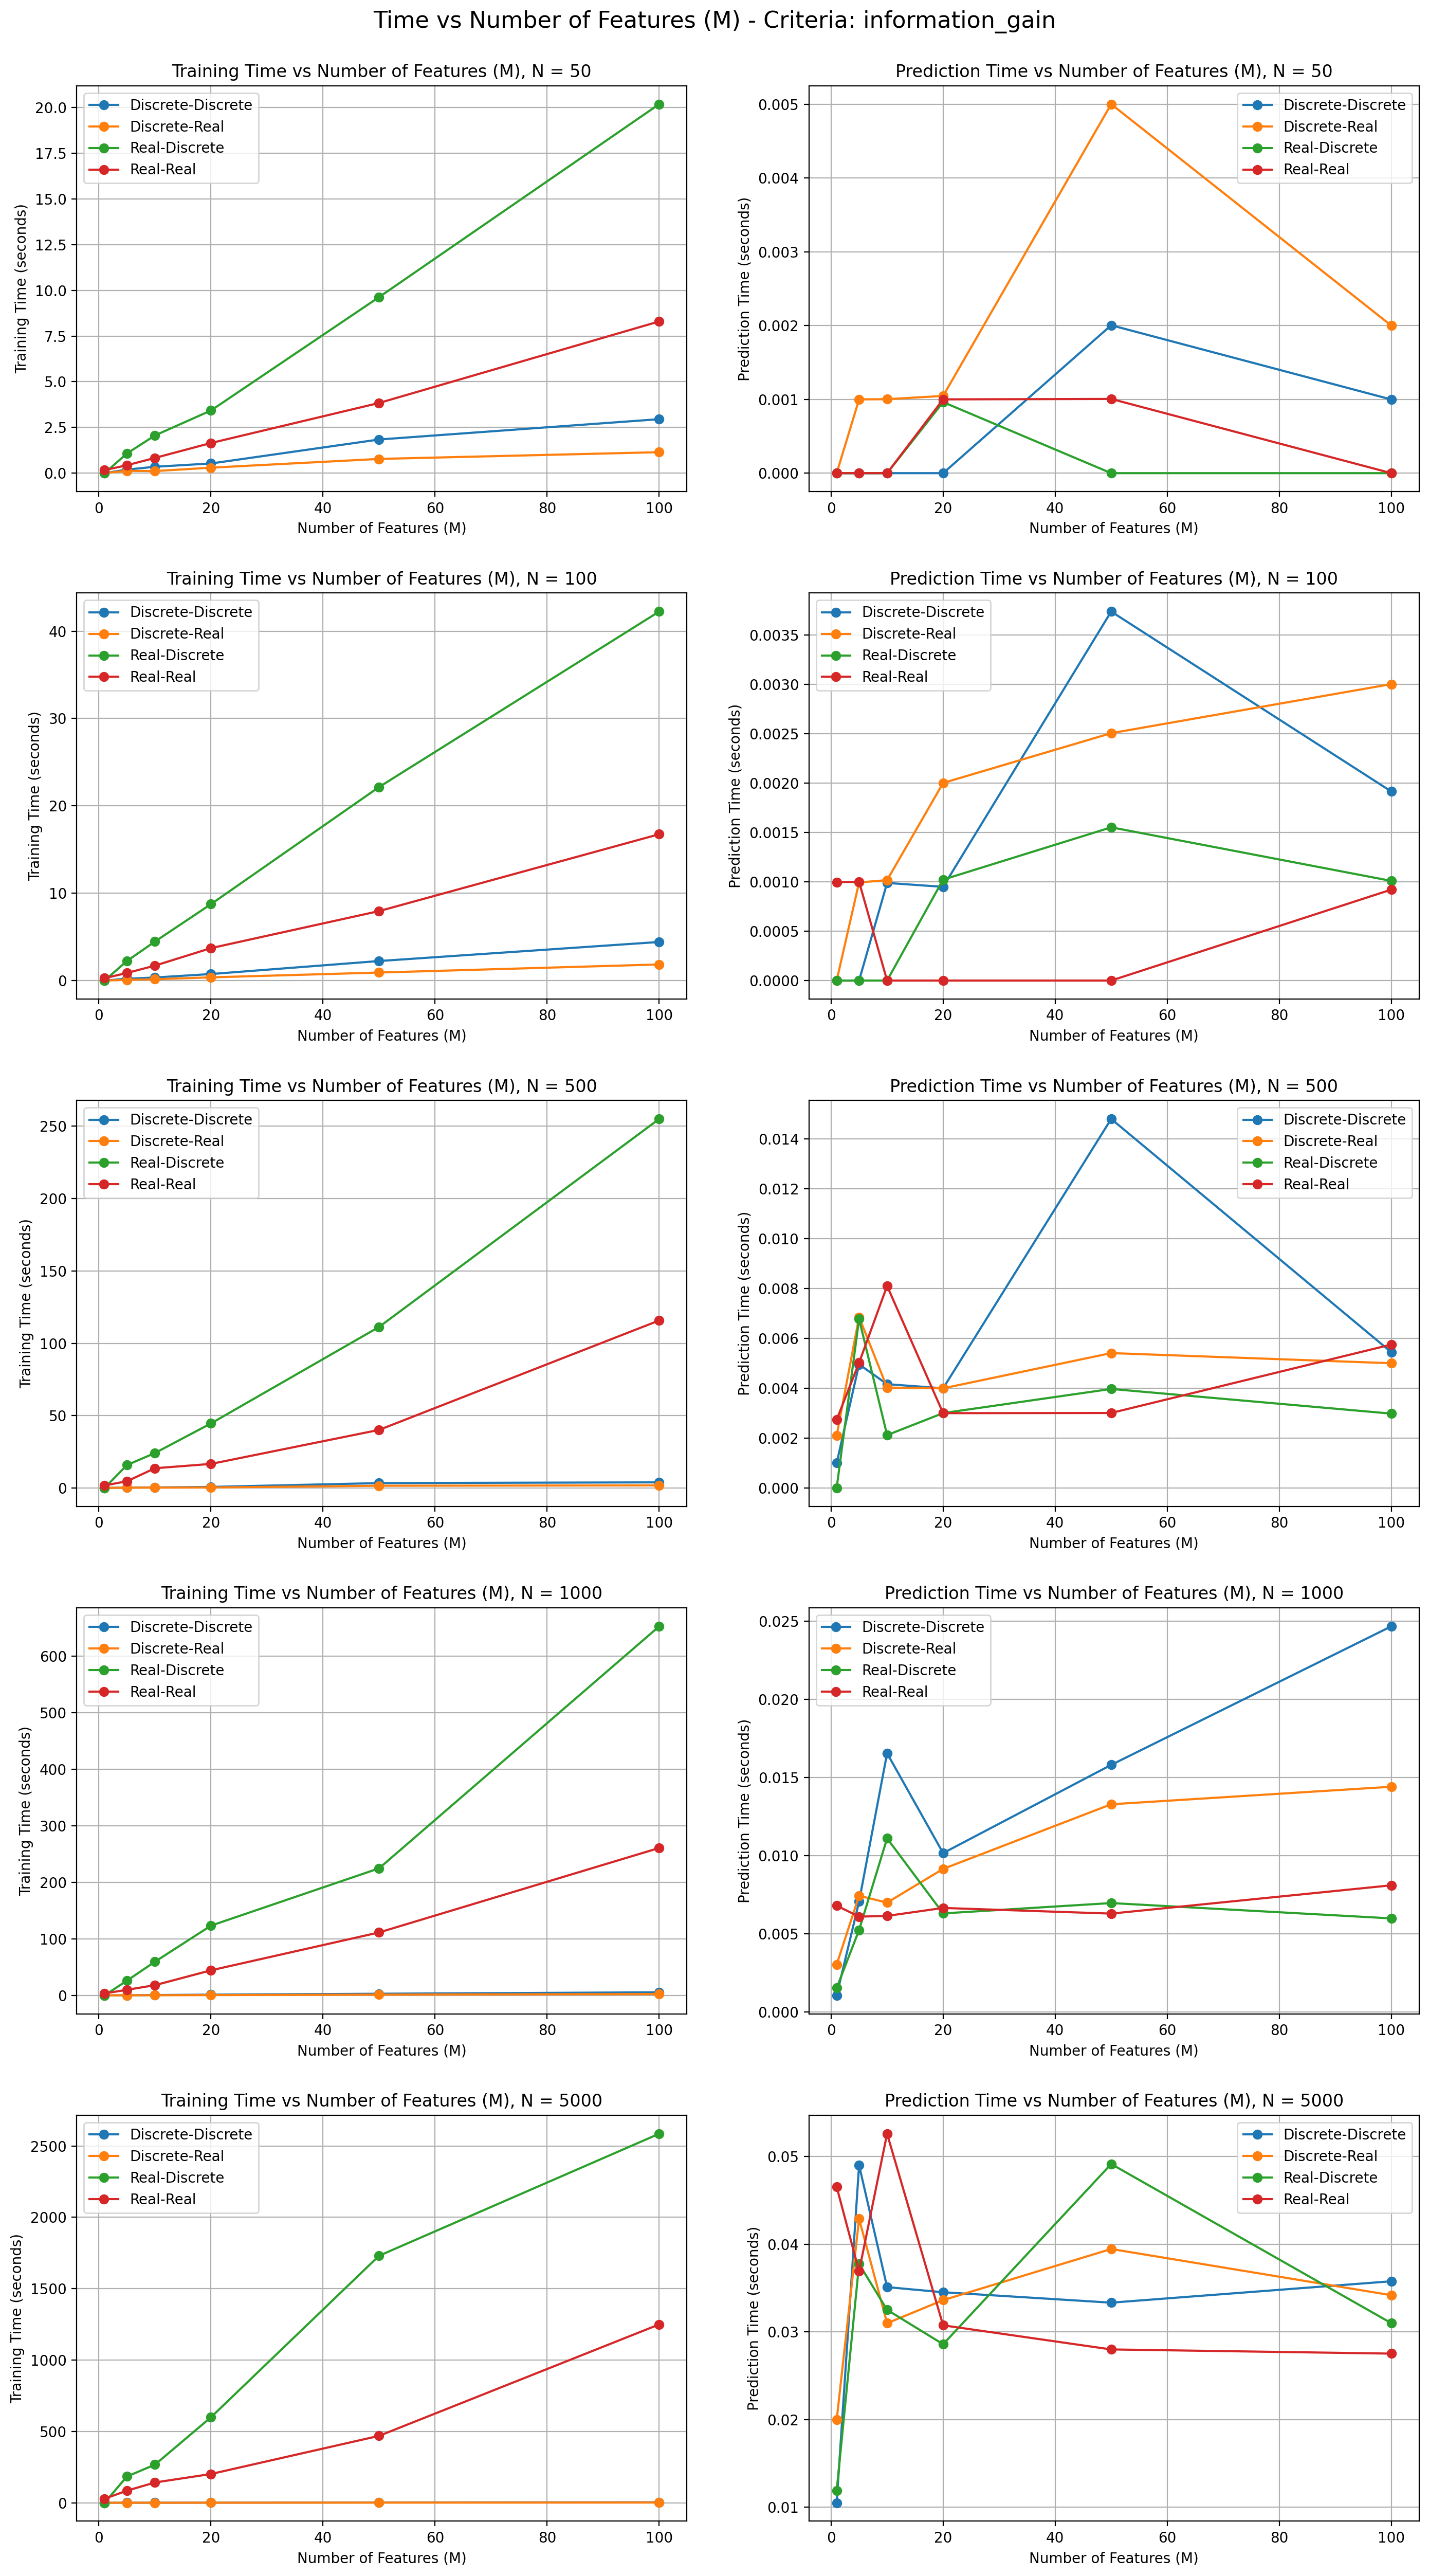

In [7]:
def plot_time_complexity_separate(results, N_values, M_values, criteria):
    # Plot training and prediction time vs N values, keeping M constant
    print("Time vs Number of Samples (N)")
    plt.figure(figsize=(14, 5*len(M_values)))
    plt.suptitle(f"Time vs Number of Samples (N) - Criteria: {criteria}", y=1, fontsize=16)

    for i, M in enumerate(M_values):
        ax1 = plt.subplot(len(M_values), 2, 2*i + 1)
        ax2 = plt.subplot(len(M_values), 2, 2*i + 2)

        for input_type in ["discrete", "real"]:
            for output_type in ["discrete", "real"]:
                train_times = []
                prediction_times = []

                for N in N_values:
                    data = results[(N, M)][(input_type, output_type)][criteria]
                    train_times.append(data["train_time"])
                    prediction_times.append(data["test_time"])
                
                ax1.plot(N_values, train_times, marker='o', label=f'{input_type.capitalize()}-{output_type.capitalize()}')
                ax2.plot(N_values, prediction_times, marker='o', label=f'{input_type.capitalize()}-{output_type.capitalize()}')

        ax1.set_xlabel("Number of Samples (N)")
        ax1.set_ylabel("Training Time (seconds)")
        ax1.set_title(f"Training Time vs Number of Samples (N), M = {M}")
        ax1.legend()
        ax1.grid(True)

        ax2.set_xlabel("Number of Samples (N)")
        ax2.set_ylabel("Prediction Time (seconds)")
        ax2.set_title(f"Prediction Time vs Number of Samples (N), M = {M}")
        ax2.legend()
        ax2.grid(True)

    plt.savefig(f"./5.4 Data/5.4_time_vs_N_{criteria}.png")
    plt.tight_layout()
    plt.subplots_adjust(wspace=0.2, hspace=0.25)
    plt.show()

    print("=" * 50)

    # Plot training and prediction time vs M values, keeping N constant
    print("Time vs Number of Features (M)")
    plt.figure(figsize=(14, 5*len(N_values)))
    plt.suptitle(f"Time vs Number of Features (M) - Criteria: {criteria}", y=1, fontsize=16)

    for i, N in enumerate(N_values):
        ax1 = plt.subplot(len(N_values), 2, 2*i + 1)
        ax2 = plt.subplot(len(N_values), 2, 2*i + 2)

        for input_type in ["discrete", "real"]:
            for output_type in ["discrete", "real"]:
                train_times = []
                prediction_times = []
                
                for M in M_values:
                    data = results[(N, M)][(input_type, output_type)][criteria]
                    train_times.append(data["train_time"])
                    prediction_times.append(data["test_time"])

                ax1.plot(M_values, train_times, marker='o', label=f'{input_type.capitalize()}-{output_type.capitalize()}')
                ax2.plot(M_values, prediction_times, marker='o', label=f'{input_type.capitalize()}-{output_type.capitalize()}')

        ax1.set_xlabel("Number of Features (M)")
        ax1.set_ylabel("Training Time (seconds)")
        ax1.set_title(f"Training Time vs Number of Features (M), N = {N}")
        ax1.legend()
        ax1.grid(True)

        ax2.set_xlabel("Number of Features (M)")
        ax2.set_ylabel("Prediction Time (seconds)")
        ax2.set_title(f"Prediction Time vs Number of Features (M), N = {N}")
        ax2.legend()
        ax2.grid(True)

    plt.savefig(f"./5.4 Data/5.4_time_vs_M_{criteria}.png")
    plt.tight_layout()
    plt.subplots_adjust(wspace=0.2, hspace=0.25)
    plt.show()
    
# Call the function to plot the separate graphs with markers
plot_time_complexity_separate(main_data, N_values, M_values, criteria="information_gain")
